<h1 align='center'>
<p style='color: maroon'>
<b>
CLUSTERED CUSTOMER BY USING K-MEANS
</b>
</p>
</h1>

## Process

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number 
    - a. Use elbow method as baseline
    - b. Apply other methods to compare with elbow
4. Use Pipeline 
    - a. Use scaler and dimensional reduction (if it is necessary). 
    - b. Use suitable clustering model for this problem.
5. Visualize cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion.

<br>

<h2 align='center'>
<span style='background:black; color:OrangeRed'>
<b>
1 | Read and Load data
</b>
</span>
</h2>
<br>

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('Clustered_Customer_Data.csv').drop(columns=['Unnamed: 0'])
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,3


In [3]:
df.shape

(8950, 18)

## 1. Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

We concertrate that our feature are numeric. Now we draw histogram for all columns.

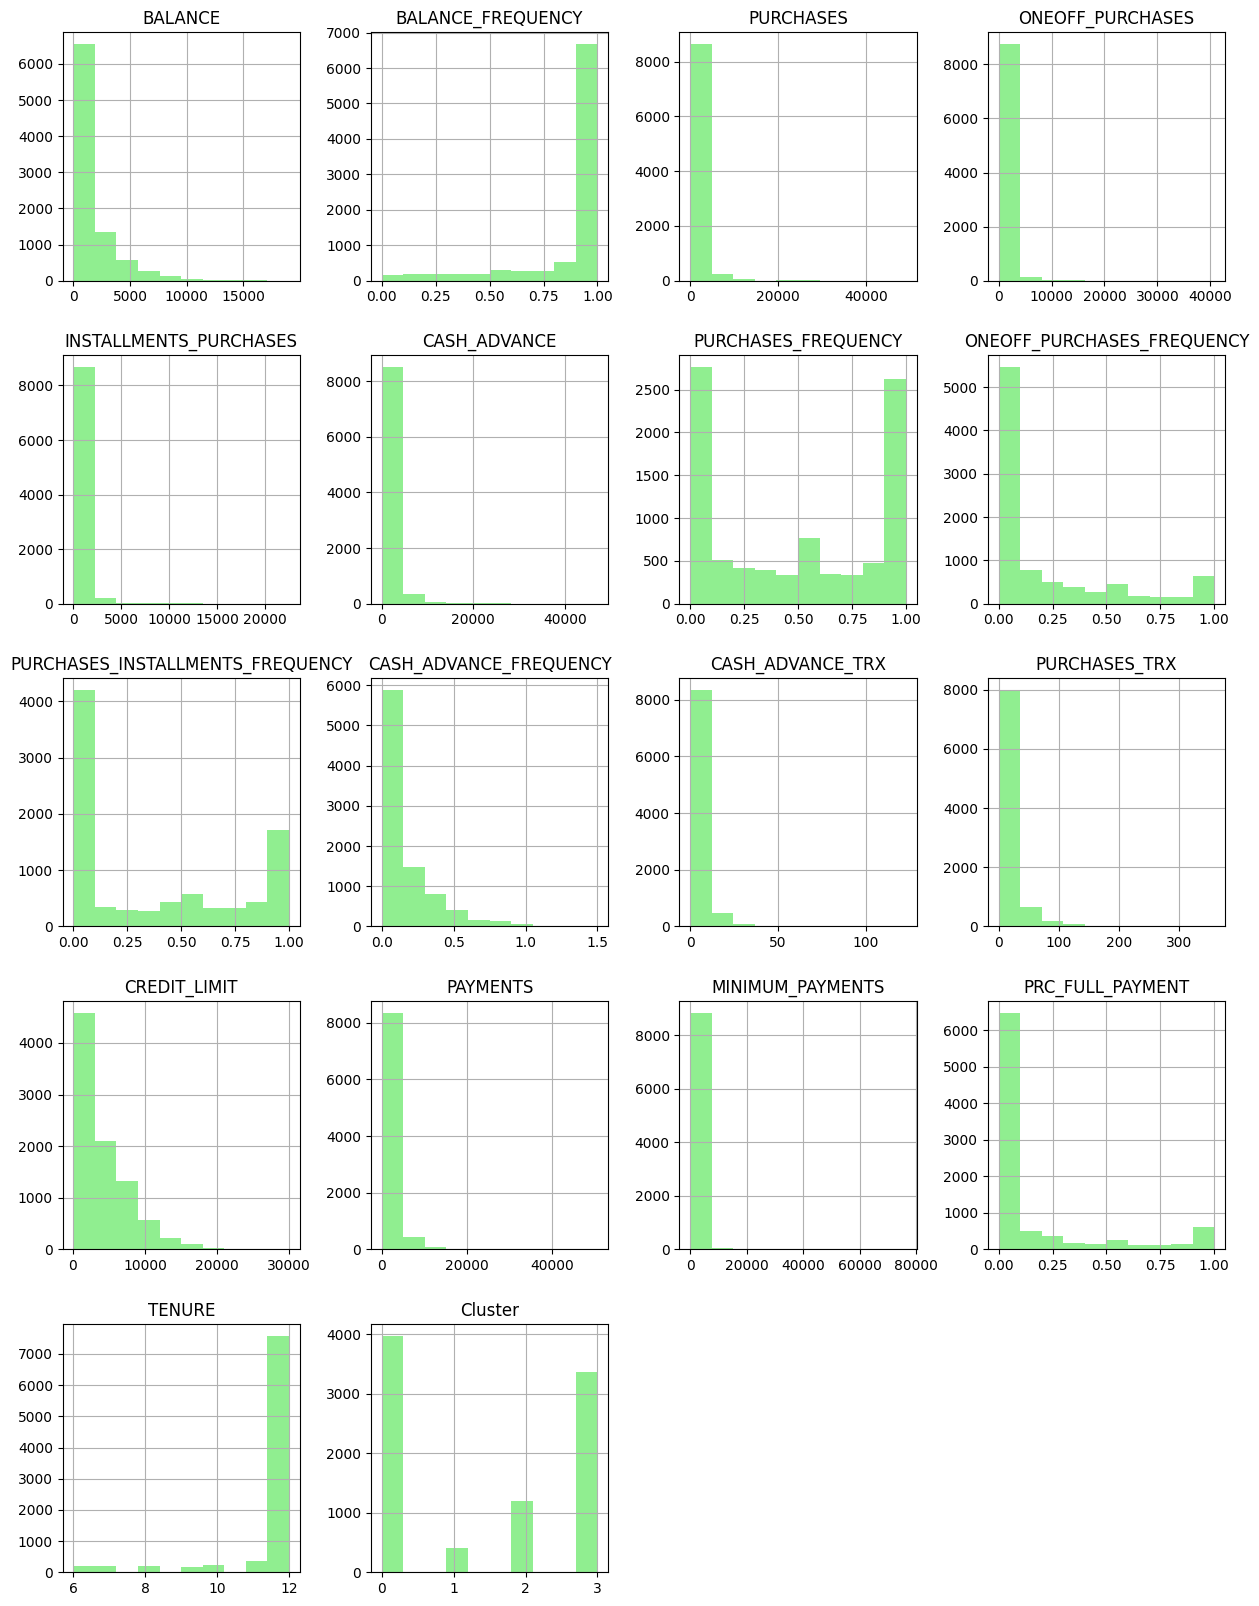

In [7]:
df.hist(color='lightgreen', figsize=(15, 20))
plt.show()

## 2. Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss 
from sklearn.decomposition import PCA

In [9]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

We can see that in our data include the feature named 'Cluster', which is saved the ground-truth cluster of each customer. Therefore, in this notebook, it play the role is label, which is supported we check our output.

So, we save it in the variable 'label' and drop it out of our df.

In [10]:
ground_truth_label = df['Cluster']

df = df.drop(columns=['Cluster'])

## 3. Normalization

Because we can see in histogram that almost has skewed distribution, so we use Log Transformation at Feature Transformation before Normalization step. 

In [11]:
import math
from sklearn.preprocessing import StandardScaler

In [12]:
def LogTransformation():
    
    '''Scaling data by using Log Transformation'''
    
    scaled_df = df.copy()
    
    for col in scaled_df.columns:
        for row in range(len(scaled_df[col])):
            scaled_df[col][row] = math.log(scaled_df[col][row] + 1)
            
    return scaled_df

In [13]:
scaled_df = LogTransformation()
scaled_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

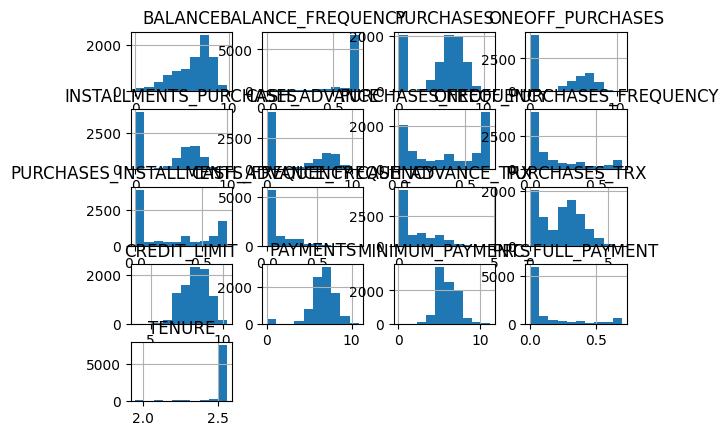

In [14]:
scaled_df.hist()

Now we apply StandarSclaer() for scaled_df to scale our value to the data which the feature have the same mean and variance ($\mu = 0, \sigma^2=1$).

In [15]:
scaled_data = StandardScaler().fit_transform(scaled_df)
scaled_data

array([[-1.20521818, -0.14875746, -0.11353236, ..., -0.85311926,
        -0.5563681 ,  0.34726215],
       [ 0.94891762,  0.17961568, -1.67985462, ...,  0.87059193,
         0.39195795,  0.34726215],
       [ 0.82499258,  0.49271003,  0.60072652, ...,  0.41658487,
        -0.5563681 ,  0.34726215],
       ...,
       [-1.4738341 , -0.09290575,  0.02737383, ..., -1.29514865,
         0.49816074, -4.40142479],
       [-1.73377525, -0.09290575, -1.67985462, ..., -1.62163267,
         0.49816074, -4.40142479],
       [-0.11830096, -0.73437135,  0.71936468, ..., -1.2374931 ,
        -0.5563681 , -4.40142479]])

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

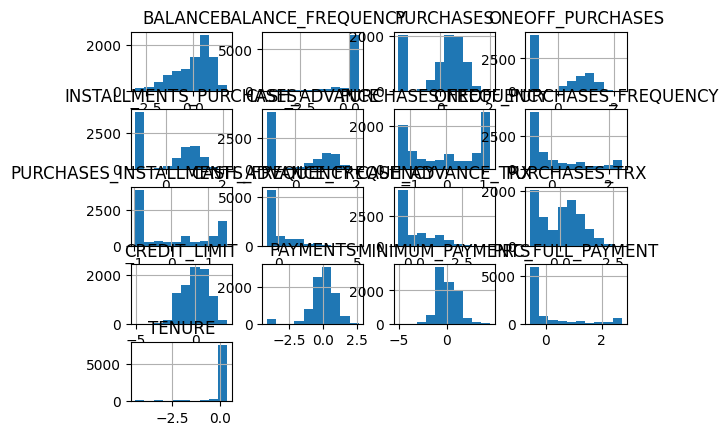

In [16]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.hist()

## 4. Detect Outliers

We draw box plot to check the outliers of our dataset.

In [17]:
scaled_df.shape

(8950, 17)

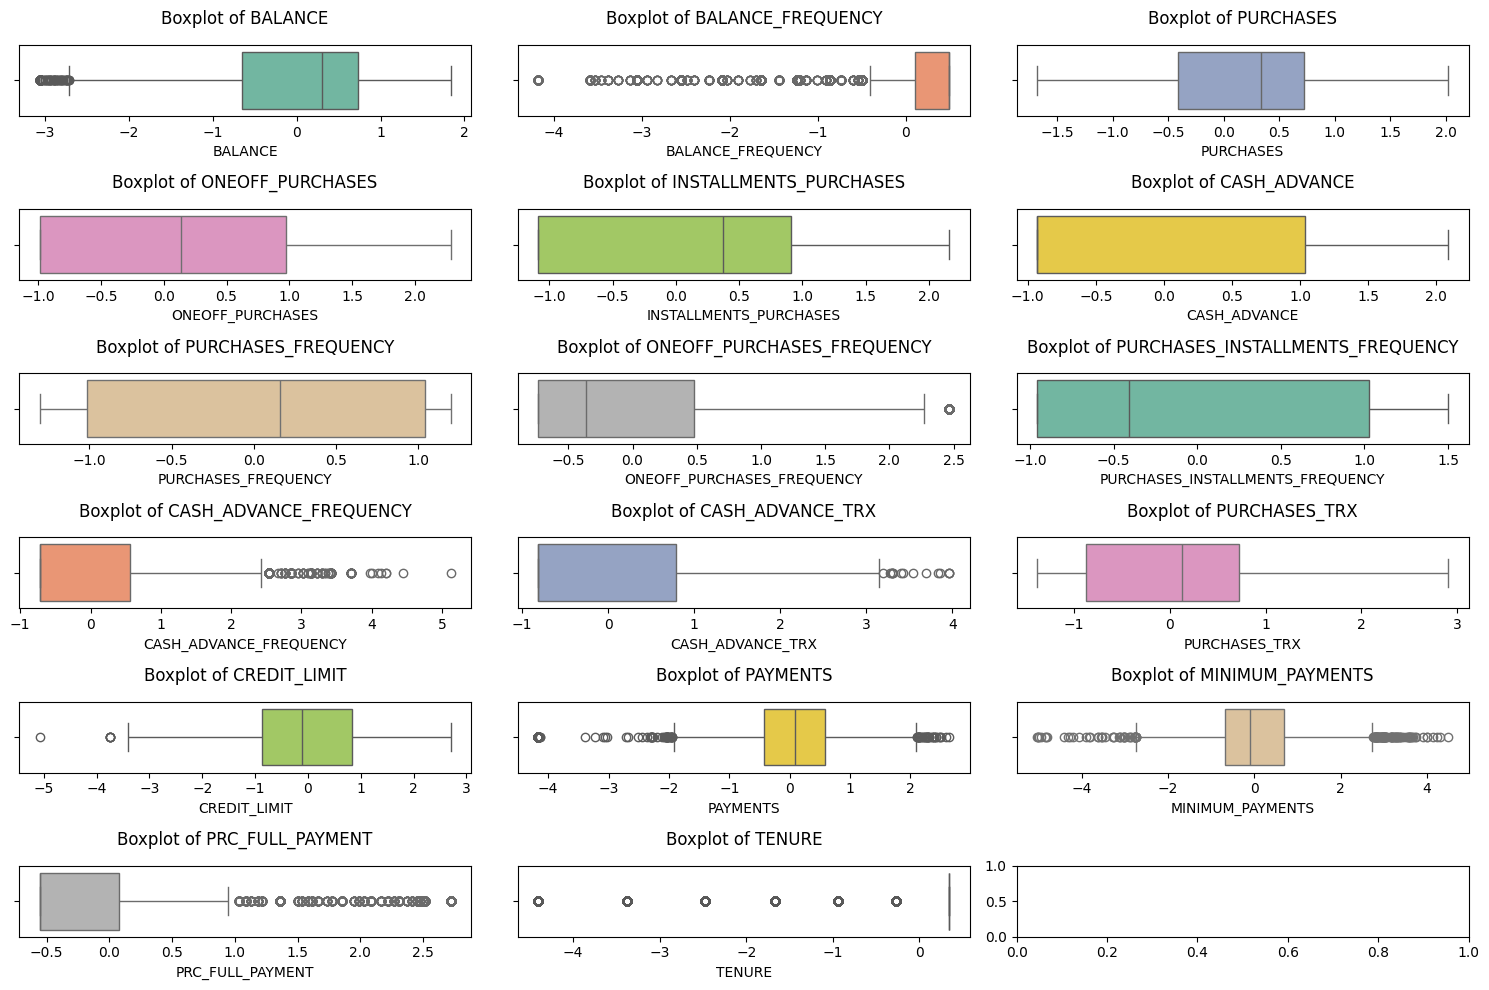

In [18]:
n_col = 3

fig, axes = plt.subplots(nrows=math.ceil(scaled_df.shape[1]/n_col),
                         ncols=n_col, 
                         figsize=(15, 10))

colors = sns.color_palette('Set2', scaled_df.shape[1])

for i, col in enumerate(scaled_df.columns):
    r, c = i // n_col, i % n_col
    sns.boxplot(data=scaled_df, x=col, ax=axes[r][c], color=colors[i])
    axes[r][c].set_title(f'Boxplot of {col}', pad=15)

plt.tight_layout()
plt.show()

We can see that our data have so many outliers, so we use IQR to detect outliers.

In [74]:
def remove_outliers_by_using_quantile(
    df: pd.DataFrame,
    thresh: float=0
) -> pd.DataFrame:
    
    '''
    Remove outlier if this data points not in [low_bound, upper_bound].
    '''
    
    print(f'Dataset shape Before remove outlier: {df.shape}')
    outliers = []
    
    for i, col in enumerate(df.columns):
    
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound, upper_bound = q1 - (thresh * iqr), q3 + (thresh * iqr)
             
        outliers.append((df[col] < lower_bound) | (df[col] > upper_bound))
        
        print(f'{df.columns[i]}: {outliers[i].sum()}')
        
        
    outliers = np.array(outliers).T
    outliers = np.sum(outliers, axis=1) > 10
    
    # Remove outliers
    after_df = df[~outliers]
    print(f'Dataset shape After remove outlier: {after_df.shape}')
     
    return after_df

In [75]:
remove_outliers_by_using_quantile(scaled_df)

Dataset shape Before remove outlier: (8950, 17)
BALANCE: 4476
BALANCE_FREQUENCY: 2221
PURCHASES: 4476
ONEOFF_PURCHASES: 2238
INSTALLMENTS_PURCHASES: 2238
CASH_ADVANCE: 2238
PURCHASES_FREQUENCY: 4221
ONEOFF_PURCHASES_FREQUENCY: 2231
PURCHASES_INSTALLMENTS_FREQUENCY: 2169
CASH_ADVANCE_FREQUENCY: 2227
CASH_ADVANCE_TRX: 1995
PURCHASES_TRX: 4234
CREDIT_LIMIT: 4277
PAYMENTS: 4476
MINIMUM_PAYMENTS: 4310
PRC_FULL_PAYMENT: 2207
TENURE: 1366
Dataset shape After remove outlier: (8642, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.148757,-0.113532,-0.987090,0.394480,-0.930733,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.347262
1,0.948918,0.179616,-1.679855,-0.987090,-1.087454,1.528788,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.347262
2,0.824993,0.492710,0.600727,1.062022,-1.087454,-0.930733,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.347262
3,0.624653,-0.857867,0.827499,1.265778,-1.087454,0.564372,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.556368,0.347262
4,0.271260,0.492710,-0.708481,-0.114307,-1.087454,-0.930733,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.347262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.492710,0.266574,-0.987090,0.754107,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-1.447207,-0.525121,-1.731000,1.359774,-4.401425
8946,-1.568051,0.492710,0.276841,-0.987090,0.763821,-0.930733,1.196820,-0.732480,1.192408,-0.724360,-0.810069,0.037255,-1.447207,-0.628912,0.687847,-0.556368,-4.401425
8947,-1.473834,-0.092906,0.027374,-0.987090,0.527794,-0.930733,0.883040,-0.732480,0.854234,-0.724360,-0.810069,-0.074955,-1.447207,-1.391318,-1.295149,0.498161,-4.401425
8948,-1.733775,-0.092906,-1.679855,-0.987090,-1.087454,0.086038,-1.302799,-0.732480,-0.958256,0.259328,0.278464,-1.379210,-2.291713,-1.661097,-1.621633,0.498161,-4.401425


## 5. Feature Engineering

### 5.1. Dimensional Reduction PCA

Display the variance of the components respectively.

In [76]:
pca = PCA(n_components=len(scaled_df.columns))

pca_result = pca.fit_transform(scaled_df)

Now we process this values:

In [77]:
np.round(pca.explained_variance_ratio_ * 100, decimals=4)

array([34.4745, 21.5993,  9.4412,  7.311 ,  6.6844,  5.2708,  4.208 ,
        3.0567,  2.7063,  1.544 ,  1.0856,  0.8191,  0.6025,  0.5369,
        0.2705,  0.2436,  0.1455])

We only keep the column has value >= threshold=0.98.

In [78]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
thresh = 0.98

n_components = np.argmax(explained_variance_ratio >= thresh) + 1
print(f"Number of components to explain {thresh * 100}% variance: {n_components}")

Number of components to explain 98.0% variance: 12


In [79]:
pca = PCA(n_components=n_components)

reduced_data = pca.fit_transform(scaled_df)

In [80]:
cleaned_data = pd.DataFrame(
    reduced_data, 
    columns=[f'PC{i+1}' for i in range(n_components)]
)

cleaned_data.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.260016,-2.678496,-0.286500,1.041042,-0.222295,0.357280,-0.717452,0.315465,-0.281905,-0.317502,-0.228030,0.390463
1,-3.483375,0.991869,-0.036970,-0.036928,1.757557,0.281989,0.774766,-0.037614,0.406104,0.414869,0.374809,-0.124481
2,1.469742,1.278558,2.720253,0.986920,-0.669906,0.199234,0.485008,-0.647608,-0.311467,1.070714,-0.654471,-0.454859


### 5.2. Choose the best k

In [81]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_method = KElbowVisualizer(KMeans(), k=(1,11))

We uss Elbow method to choose the best 'k'.

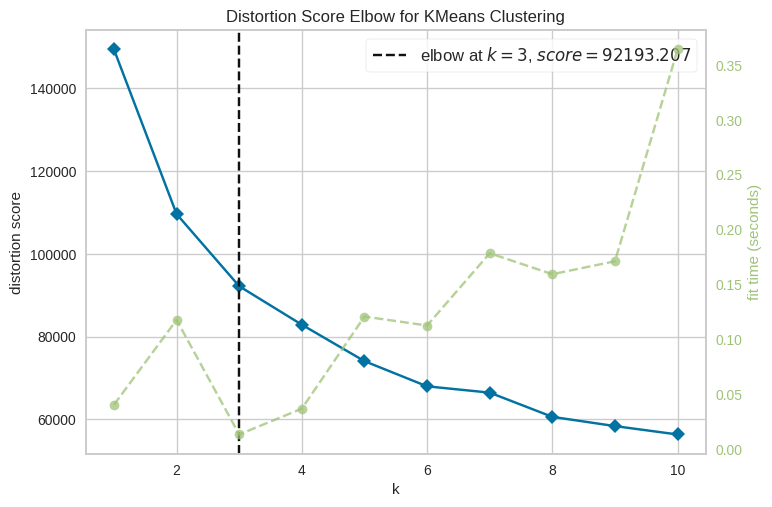

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
elbow_method.fit(cleaned_data)
elbow_method.show()

We choose $k=3$.

## 6. Modeling

In [108]:
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=242)
kmeans_model.fit(cleaned_data)

KMeans(n_clusters=3, random_state=242)

Display the label and centroid of our data samples.

In [109]:
labels = kmeans_model.labels_
labels

array([1, 2, 0, ..., 1, 2, 1], dtype=int32)

In [110]:
# để dự đoán ra label của tập testing (ta giả sử là cleaned_data) ta dùng .predict
pred = kmeans_model.predict(cleaned_data)
pred

array([1, 2, 0, ..., 1, 2, 1], dtype=int32)

In [111]:
centroid = kmeans_model.cluster_centers_
centroid

array([[ 1.79875999,  1.47894707,  0.20794535,  0.02430879, -0.19302576,
        -0.05404768, -0.05527989,  0.02302417,  0.02581053,  0.10935048,
         0.06244186,  0.01656688],
       [ 0.99903107, -1.85311056, -0.19373164,  0.01281697,  0.06501822,
        -0.11151237,  0.02378144,  0.02209815, -0.01020083, -0.16924207,
        -0.12358909, -0.04803713],
       [-3.02080721,  0.30916522, -0.02631008, -0.04010936,  0.14431734,
         0.17586777,  0.03594093, -0.04838899, -0.01772389,  0.056512  ,
         0.06041002,  0.03194943]])

In [112]:
kmeans_model.cluster_centers_.shape

(3, 12)

## 7. Visualize Output

In [113]:
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

### 7.1. 2 Dimensional

In [114]:
pca = PCA(n_components=2)

pca_df = pd.DataFrame(pca.fit_transform(cleaned_data), columns=["pc1", "pc2"])
pca_df["Cluster"] = labels
pca_df.head()

,pc1,pc2,Cluster
0,-0.260016,-2.678496,1
1,-3.483375,0.991869,2
2,1.469742,1.278558,0
3,-1.373669,-0.761627,2
4,-1.151204,-1.368904,1


In [115]:
centroid_pca = pca.transform(centroid)

In [116]:
fig = px.scatter(
    pca_df,
    x='pc1',
    y='pc2',
    color='Cluster',
    title='K-Means Clustering Results (2D)',
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter(
        x=centroid_pca[:, 0],
        y=centroid_pca[:, 1],
        mode='markers',
        marker=dict(size=10, color='Black', symbol='x'),
        name='Centers',
    )
)

fig.update_layout(width=800, height=600)
fig.show()

### 7.2. 3 Dimensional

In [117]:
pca = PCA(n_components=3)

pca_df = pd.DataFrame(pca.fit_transform(cleaned_data), 
                      columns=['pc1', 'pc2', 'pc3'])
pca_df["Cluster"] = labels
pca_df.head()

,pc1,pc2,pc3,Cluster
0,-0.260016,-2.678496,-0.286500,1
1,-3.483375,0.991869,-0.036970,2
2,1.469742,1.278558,2.720253,0
3,-1.373669,-0.761627,1.757777,2
4,-1.151204,-1.368904,0.953653,1


In [118]:
centroid_pca = pca.transform(centroid)

In [119]:
fig = px.scatter_3d(
    pca_df,
    x='pc1',
    y='pc2',
    z='pc3',
    color='Cluster',
    title='K-Means Clustering Results (3D)',
    color_continuous_scale=px.colors.sequential.Sunsetdark,
)

fig.add_trace(
    go.Scatter3d(
        x=centroid_pca[:, 0],
        y=centroid_pca[:, 1],
        z=centroid_pca[:, 2],
        mode='markers',
        marker=dict(size=10, color='Black', symbol='x'),
        name='Centers',
    )
)
fig.update_layout(width=800, height=600)
fig.show()